In [1]:
import requests
import pandas as pd
from pandas.tseries.offsets import MonthEnd, YearEnd

# Data
* Sources : Bloomberg, EIKON, BOK, Eurostat
* Read file : BOK API data, OECD data, other raw data(bloomberg, CBOE..)

In [2]:
krw_eur = pd.read_excel('./krw_eur.xlsx')
cpi_kr = pd.read_excel('./cpi_kr.xlsx')
int_kr_3m = pd.read_excel('./int_kr_3m.xlsx')
int_kr_1y = pd.read_excel('./int_kr_1y.xlsx')
int_kr_3y = pd.read_excel('./int_kr_3y.xlsx')
int_kr_10y = pd.read_excel('./int_kr_10y.xlsx')
gdp_kr_sa = pd.read_excel('./gdp_kr_sa.xlsx')
gdp_kr = pd.read_excel('./gdp_kr.xlsx')
ca_kr = pd.read_excel('./ca_kr.xlsx')
reserve_kr = pd.read_excel('./reserve_kr.xlsx')
ca_kr_eur = pd.read_excel('./ca_kr_eur.xlsx')
export_settle_eur = pd.read_excel('./export_settle_eur.xlsx')
import_settle_eur = pd.read_excel('./import_settle_eur.xlsx')

### merge bok data

In [3]:
# excel file list 
filenames = [
    'krw_eur',  # krw/eur
    'cpi_kr',  # CPI_kr
    'int_kr_3m',  # korea 3m interest rate
    'int_kr_1y',  # korea 1y interest rate
    'int_kr_3y',  # korea 3y interest rate
    'int_kr_10y',  # korea 10y interest rate
    'gdp_kr_sa',  # GDP growth, QoQ
    'gdp_kr',  # Nominal GDP
    'ca_kr',  # Current Account korea
    'reserve_kr',  # Foreign Reserves korea
    'ca_kr_eur',  # Current account korea realated eur
    'export_settle_eur',  # Export volume settled by EUR
    'import_settle_eur',  # Import volume settled by EUR
]

In [4]:
# merge data
dfs = []

for fname in filenames:
    print(f'Loading {fname}...')
    
    filepath = f'./{fname}.xlsx'
    
    df = pd.read_excel(filepath)
    df = df.set_index('date')
    
    if fname in [
        'gdp_kr_sa',  # 분기별 GDP성장률
    ]:
        df[fname] = df[fname].rolling(4).sum()  # 연간 성장률로 변환
        
    elif fname in [
        'ca_kr',  # 월별 경상수지
        'export_settle_eur',  # 월별 수출 유로화결제금액
        'import_settle_eur',  # 월별 수입 유로화결제금액
    ]:
        df[fname] = df[fname].rolling(12).sum()  # 경상수지 연간으로 변환
    
    dfs.append(df)
    
print('** completed!! **')
dfs

Loading krw_eur...
Loading cpi_kr...
Loading int_kr_3m...
Loading int_kr_1y...
Loading int_kr_3y...
Loading int_kr_10y...
Loading gdp_kr_sa...
Loading gdp_kr...
Loading ca_kr...
Loading reserve_kr...
Loading ca_kr_eur...
Loading export_settle_eur...
Loading import_settle_eur...
** completed!! **


[            krw_eur
 date               
 1994-04-11   916.46
 1994-04-12   916.25
 1994-04-13   914.91
 1994-04-14   916.73
 1994-04-15   915.53
 ...             ...
 2023-08-08  1434.97
 2023-08-09  1437.95
 2023-08-10  1446.97
 2023-08-11  1446.72
 2023-08-14  1445.68
 
 [7869 rows x 1 columns],
             cpi_kr
 date              
 1951-08-31    0.15
 1951-09-30    0.15
 1951-10-31    0.13
 1951-11-30    0.13
 1951-12-31    0.14
 ...            ...
 2023-03-31  128.00
 2023-04-30  128.28
 2023-05-31  128.66
 2023-06-30  128.65
 2023-07-31  128.74
 
 [864 rows x 1 columns],
             int_kr_3m
 date                 
 2006-09-25      4.540
 2006-09-26      4.550
 2006-09-27      4.550
 2006-09-28      4.550
 2006-09-29      4.540
 ...               ...
 2023-08-08      3.561
 2023-08-09      3.557
 2023-08-10      3.558
 2023-08-11      3.555
 2023-08-14      3.572
 
 [4191 rows x 1 columns],
             int_kr_1y
 date                 
 2000-02-01      8.710
 2000-02-02     

## loading and merge other data

1) OECD PPP

In [5]:
# read oecd data
def load_oecd_data(filepath, country, column) :
    df = pd.read_excel(filepath, sheet_name='DP_LIVE_12082023112258704')
    
    df = df[df['LOCATION'] == country]
    df['year'] = df['TIME']
    df['month'] = 1
    df['day'] = 1
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']]) + YearEnd()

    df = df.set_index('date')
    df = df['Value'].to_frame()
    df = df.dropna()
    df = df.astype(float)
    
    df.columns = [column]
    
    return df

In [6]:
# stack data
df_ppp_kr = \
    load_oecd_data('./OECD_PPP.xlsx', 'KOR', 'ppp_kr')   # korea PPP

df_ppp_eur = \
    load_oecd_data('./OECD_PPP.xlsx', 'EA19', 'ppp_eur')  # euro PPP

dfs.append(df_ppp_kr)
dfs.append(df_ppp_eur)

In [7]:
dfs

[            krw_eur
 date               
 1994-04-11   916.46
 1994-04-12   916.25
 1994-04-13   914.91
 1994-04-14   916.73
 1994-04-15   915.53
 ...             ...
 2023-08-08  1434.97
 2023-08-09  1437.95
 2023-08-10  1446.97
 2023-08-11  1446.72
 2023-08-14  1445.68
 
 [7869 rows x 1 columns],
             cpi_kr
 date              
 1951-08-31    0.15
 1951-09-30    0.15
 1951-10-31    0.13
 1951-11-30    0.13
 1951-12-31    0.14
 ...            ...
 2023-03-31  128.00
 2023-04-30  128.28
 2023-05-31  128.66
 2023-06-30  128.65
 2023-07-31  128.74
 
 [864 rows x 1 columns],
             int_kr_3m
 date                 
 2006-09-25      4.540
 2006-09-26      4.550
 2006-09-27      4.550
 2006-09-28      4.550
 2006-09-29      4.540
 ...               ...
 2023-08-08      3.561
 2023-08-09      3.557
 2023-08-10      3.558
 2023-08-11      3.555
 2023-08-14      3.572
 
 [4191 rows x 1 columns],
             int_kr_1y
 date                 
 2000-02-01      8.710
 2000-02-02     

2) Other variables(dxy, vix, gas, euro data)

In [8]:
# read other data (folder : data)
df = pd.read_excel('./other raw data.xlsx', sheet_name = None)
raw_d = df['raw_d']
raw_m = df['raw_m']
raw_q = df['raw_q']

In [9]:
# daily data stacking
raw_d = raw_d.set_index('date')

for idx, name in enumerate(raw_d.columns):
    print(f'Loading {name}...')
    df = raw_d[name].to_frame()
    
    dfs.append(df)
    
print('completed!')

Loading dxy...
Loading vix...
Loading gas...
Loading int_eur_3m...
Loading int_eur_1y...
Loading int_eur_3y...
Loading int_eur_10y...
completed!


In [10]:
# monthly data stacking

raw_m['date'] = raw_m['date'] + MonthEnd()
raw_m = raw_m.set_index('date')

for idx, name in enumerate(raw_m.columns):
    print(f'Loading {name}...')
    df = raw_m[name].to_frame()
    
    dfs.append(df)
    
print('completed!')

Loading hicp_euro...
completed!


In [11]:
# quaterly data stacking

raw_q['date'] = raw_q['date'] + MonthEnd()
raw_q = raw_q.set_index('date')

for idx, name in enumerate(raw_q.columns):
    print(f'Loading {name}...')
    df = raw_q[name].to_frame()
    df[name] = df[name].rolling(4).sum()
        
    dfs.append(df)
    
print('completed!')

Loading gdp_euro_sa...
completed!


In [12]:
dfs

[            krw_eur
 date               
 1994-04-11   916.46
 1994-04-12   916.25
 1994-04-13   914.91
 1994-04-14   916.73
 1994-04-15   915.53
 ...             ...
 2023-08-08  1434.97
 2023-08-09  1437.95
 2023-08-10  1446.97
 2023-08-11  1446.72
 2023-08-14  1445.68
 
 [7869 rows x 1 columns],
             cpi_kr
 date              
 1951-08-31    0.15
 1951-09-30    0.15
 1951-10-31    0.13
 1951-11-30    0.13
 1951-12-31    0.14
 ...            ...
 2023-03-31  128.00
 2023-04-30  128.28
 2023-05-31  128.66
 2023-06-30  128.65
 2023-07-31  128.74
 
 [864 rows x 1 columns],
             int_kr_3m
 date                 
 2006-09-25      4.540
 2006-09-26      4.550
 2006-09-27      4.550
 2006-09-28      4.550
 2006-09-29      4.540
 ...               ...
 2023-08-08      3.561
 2023-08-09      3.557
 2023-08-10      3.558
 2023-08-11      3.555
 2023-08-14      3.572
 
 [4191 rows x 1 columns],
             int_kr_1y
 date                 
 2000-02-01      8.710
 2000-02-02     

In [13]:
# 후보 변수 개수 check : 24개
## (8) KRW/EUR, PPP_KR, PPP_EUR, CPI_KR, HICP_EURO, GDP_growth_kr, GDP_growth_euro, Nominal GDP_kr
## (4)Current Account_KR,Current Account_KR with Euro, Korea export settled by EUR, Korea import settled by EUR
## (8)interest rate_KR(3m, 1y, 2y, 10y), interest rate_EUR(3m, 1y, 2y, 10y)
## (4)DXY, VIX, GAS, Foreign Reserves of Korea

len(dfs)

24

In [14]:
# concatenate
df_merged = pd.concat(dfs, axis = 1)
df_merged = df_merged.resample('M').last() # 월말 data만 뽑기
df_merged = df_merged.fillna(method = 'ffill') # 과거 데이터로 채우기

In [15]:
df_merged.head()

,krw_eur,cpi_kr,int_kr_3m,int_kr_1y,int_kr_3y,int_kr_10y,gdp_kr_sa,gdp_kr,ca_kr,reserve_kr,...,ppp_eur,dxy,vix,gas,int_eur_3m,int_eur_1y,int_eur_3y,int_eur_10y,hicp_euro,gdp_euro_sa
date,,,,,,,,,,,,,,,,,,,,,
1951-08-31,NaN,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-09-30,NaN,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-10-31,NaN,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-11-30,NaN,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-12-31,NaN,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_merged.tail()

,krw_eur,cpi_kr,int_kr_3m,int_kr_1y,int_kr_3y,int_kr_10y,gdp_kr_sa,gdp_kr,ca_kr,reserve_kr,...,ppp_eur,dxy,vix,gas,int_eur_3m,int_eur_1y,int_eur_3y,int_eur_10y,hicp_euro,gdp_euro_sa
date,,,,,,,,,,,,,,,,,,,,,
2023-04-30,1477.64,128.28,3.253,3.281,3.293,3.360,1.0,1665245.5,9454.2,426683640.0,...,0.685062,101.66,15.78,38.00,2.881036,2.942529,2.495855,2.444445,7.0,1.1
2023-05-31,1418.99,128.66,3.527,3.540,3.459,3.532,1.0,1665245.5,7585.9,420983378.0,...,0.685062,104.33,17.94,25.50,3.074462,3.015395,2.417817,2.383764,6.1,1.1
2023-06-30,1426.55,128.65,3.548,3.563,3.662,3.675,1.0,1665245.5,7395.9,421453923.0,...,0.685062,102.91,13.59,36.70,3.389088,3.451520,2.837895,2.507098,5.5,0.6
2023-07-31,1411.33,128.74,3.582,3.523,3.681,3.761,1.0,1665245.5,7395.9,421803807.0,...,0.685062,101.86,13.63,27.35,3.478634,3.415310,2.742805,2.543407,5.3,0.6
2023-08-31,1445.68,128.74,3.572,3.489,3.747,3.889,1.0,1665245.5,7395.9,421803807.0,...,0.685062,102.84,14.84,36.90,3.420345,3.325811,2.734368,2.578223,5.3,0.6


# Preprocessing

### 전년동월대비 상승률 변환

In [17]:
## KRW/EUR
df_merged['ann_ret'] = \
    df_merged['krw_eur'].pct_change(periods = 12) * 100

# 향후 환율 상승률
df_merged['F12.ann_ret'] = df_merged['ann_ret'].shift(-12)  

## CPI_kr
df_merged['infl_kr'] = \
    df_merged['cpi_kr'].pct_change(periods=12) *100

## HICP
df_merged['infl_eur'] = df_merged['hicp_euro']

## Natural Gas price
df_merged['gas_g'] = \
    df_merged['gas'].pct_change(periods=12) *100

## Dollar Index
df_merged['dxy_g'] = \
    df_merged['dxy'].pct_change(periods=12) *100


### Real KRW/EUR

$$
Real~ KRW/EUR = \frac{KRW/EUR \times P_{eur}} {P_{korea}} 
= KRW/EUR \times \frac{P_{eur}}{P_{US}} \times \frac{P_{US}}{P_{kr}}
= KRW/EUR \times \frac{PPP_{eur}}{PPP_{kr}}
$$

In [18]:
## Real KR/EUR > 1 : KRW/EUR 환율이 높은 상황 : 원화 저평가, EUR 고평가
### Real KR/EUR 상승 -> 원화 저평가 심화 -> 평균 회귀 위해 향후 KRW/EUR 하락해야함
df_merged['real_krw_eur'] = \
    df_merged['krw_eur'] * df_merged['ppp_eur'] / df_merged['ppp_kr']

### Ratio

In [19]:
## CA/GDP
df_merged['ca_gdp_kr'] = \
    df_merged['ca_kr'] / df_merged['gdp_kr']*100

## CA_EUR/GDP
df_merged['ca_gdp_kr_eur'] = \
    df_merged['ca_kr_eur'] / df_merged['gdp_kr']*100

## Trade Balance settled by euro / GDP
df_merged['tb_gdp_kr_eur'] = \
    (df_merged['export_settle_eur'] - df_merged['import_settle_eur']) / df_merged['gdp_kr']*100

## Foreign Reserves/GDP
df_merged['reserve_gdp_kr'] = \
    df_merged['reserve_kr'] / df_merged['gdp_kr']/1000 * 100

### Difference

In [20]:
## diff_interest rate
df_merged['int_rate_diff_3m'] = \
    df_merged['int_kr_3m'] - df_merged['int_eur_3m']

df_merged['int_rate_diff_1y'] = \
    df_merged['int_kr_1y'] - df_merged['int_eur_1y']

df_merged['int_rate_diff_3y'] = \
    df_merged['int_kr_3y'] - df_merged['int_eur_3y']

df_merged['int_rate_diff_10y'] = \
    df_merged['int_kr_10y'] - df_merged['int_eur_10y']

## diff_inflation
df_merged['infl_diff'] = \
    df_merged['infl_kr'] - df_merged['infl_eur']

### PCA of diff_interest rate

In [21]:
df_pca_all = df_merged[['int_rate_diff_3m', 'int_rate_diff_1y','int_rate_diff_3y','int_rate_diff_10y']].dropna()
df_pca_mid = df_pca_all.iloc[:, :-1]

In [22]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)  # 1 factors 
pca_all = pca.fit_transform(df_pca_all) # PCA
pca_mid = pca.fit_transform(df_pca_mid) # PCA
pca_all = pd.DataFrame(pca_all, columns = ['pca_all'], index = df_pca_all.index)
pca_mid = pd.DataFrame(pca_mid, columns = ['pca_mid'], index = df_pca_mid.index)

# Relation Check

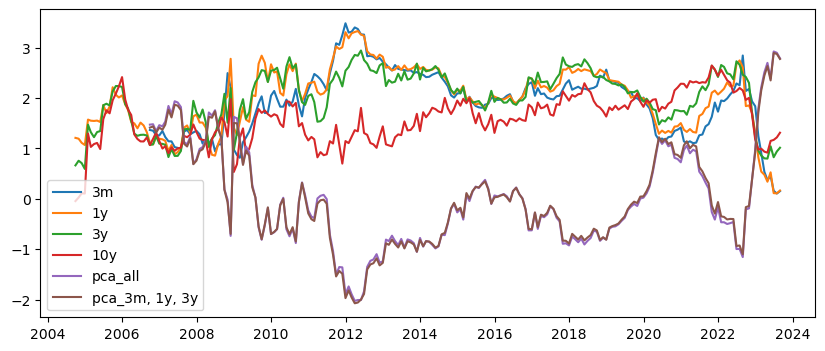

In [23]:
# Interest rate diff + PCA

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,4)
plt.plot(df_merged['int_rate_diff_3m'], label = '3m')
plt.plot(df_merged['int_rate_diff_1y'], label = '1y')
plt.plot(df_merged['int_rate_diff_3y'], label = '3y')
plt.plot(df_merged['int_rate_diff_10y'], label = '10y')
plt.plot(pca_all, label = 'pca_all')
plt.plot(pca_mid, label = 'pca_3m, 1y, 3y')
plt.legend()
plt.show()

In [24]:
# PCA 방향성 부여
df_merged['pca_all_new'] = -1* pca_all
df_merged['pca_mid_new'] = -1* pca_mid

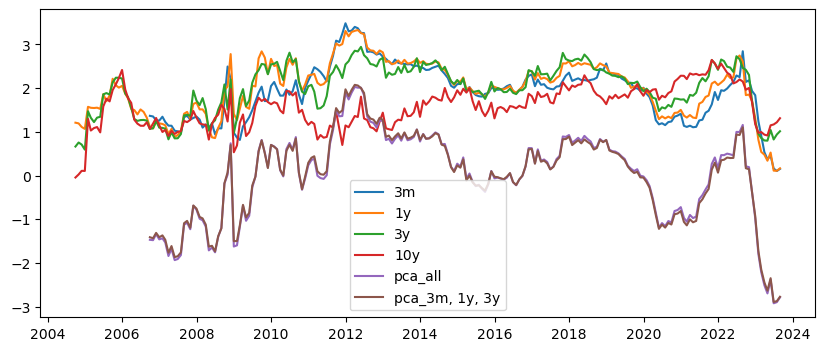

In [25]:
# Interest rate diff with PCA_new

plt.plot(df_merged['int_rate_diff_3m'], label = '3m')
plt.plot(df_merged['int_rate_diff_1y'], label = '1y')
plt.plot(df_merged['int_rate_diff_3y'], label = '3y')
plt.plot(df_merged['int_rate_diff_10y'], label = '10y')
plt.plot(df_merged['pca_all_new'], label = 'pca_all')
plt.plot(df_merged['pca_mid_new'], label = 'pca_3m, 1y, 3y')
plt.legend()
plt.show()

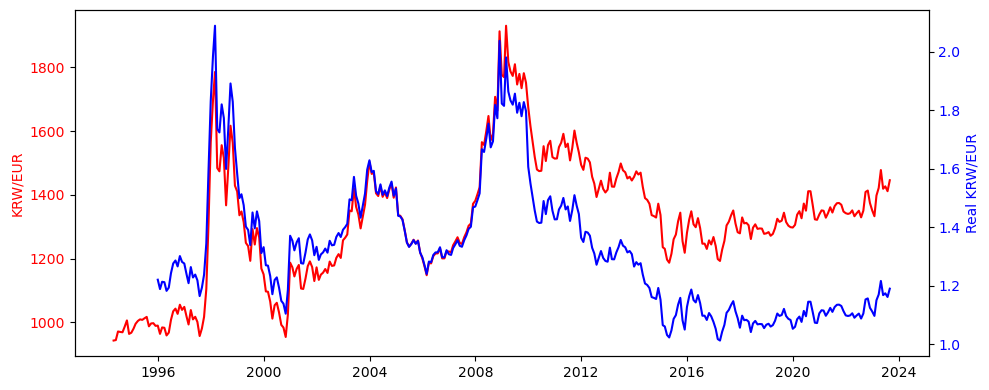

In [26]:
# Graph_KRW/EUR & Real KRW/EUR

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_ylabel('KRW/EUR', color=color)
ax1.plot(df_merged['krw_eur'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Real KRW/EUR', color=color)  # we already handled the x-label with ax1
ax2.plot(df_merged['real_krw_eur'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

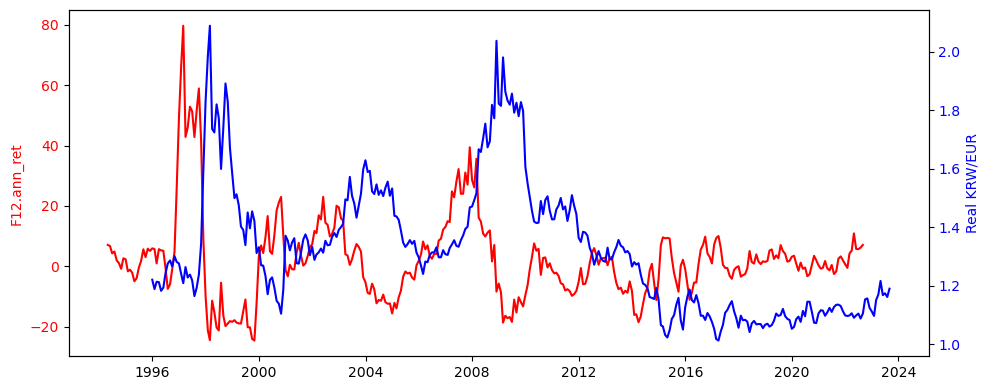

In [27]:
# Graph_F12.ann & Real KRW/EUR
## Real KRW/EUR이 낮을때는 향후 원/유로 환율이 상승하고(12개월 후 환율상승률 +)
## Real KRW/EUR이 높을때는 향후 원/유로 환율이 하락함(12개월 후 환율상승률 -)

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_ylabel('F12.ann_ret', color=color)
ax1.plot(df_merged['F12.ann_ret'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Real KRW/EUR', color=color)  # we already handled the x-label with ax1
ax2.plot(df_merged['real_krw_eur'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


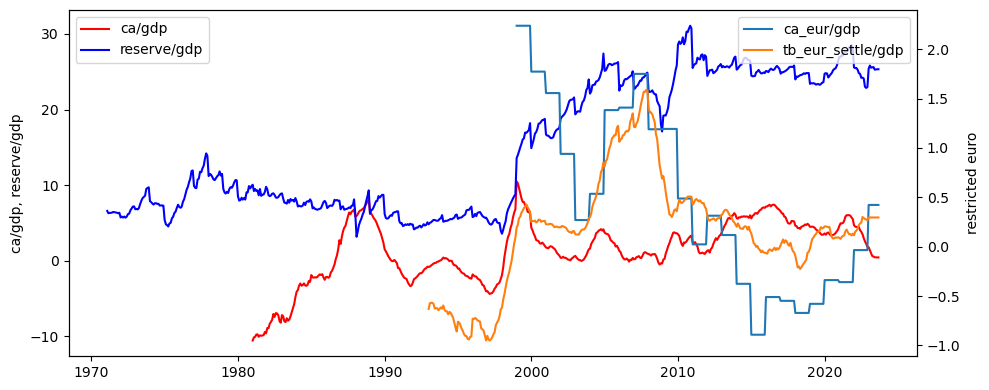

In [28]:
# ratio

fig, ax1 = plt.subplots()

ax1.set_ylabel('ca/gdp, reserve/gdp')
ax1.plot(df_merged['ca_gdp_kr'], color = 'red', label = 'ca/gdp')
ax1.plot(df_merged['reserve_gdp_kr'], color = 'blue', label = 'reserve/gdp')
ax1.tick_params(axis='y')
plt.legend()

ax2 = ax1.twinx()

ax2.set_ylabel('restricted euro')  # we already handled the x-label with ax1
ax2.plot(df_merged['ca_gdp_kr_eur'], label = 'ca_eur/gdp')
ax2.plot(df_merged['tb_gdp_kr_eur'], label = 'tb_eur_settle/gdp')
ax2.tick_params(axis='y')
plt.legend()

fig.tight_layout()
plt.show()


### VIX stationarity Test(ADF test)

In [29]:
from statsmodels.tsa.stattools import adfuller

VIX = df_merged['vix'].dropna()
adfuller(VIX, autolag = "AIC")[1]
# p-value -> 1% 유의수준에서 기각 
# -> VIX는 stationary time series 
# -> 원계열 그대로 설명변수 사용 가능

0.0056166417042286445

# Fitting OLS

In [41]:
# 후보 변수 추출
df_potential = df_merged[[
    'F12.ann_ret',   # 향후 12개월 환율 상승률
    'real_krw_eur',  # 실질 원유로 환율
    'gdp_kr_sa',   # 한국 연간 실질경제성장률
    'gdp_euro_sa',  # 유로 연간 실질경제성장률
    'infl_diff',    # 물가상승률 격차
    'int_rate_diff_3m',   # 3개월 이자율 격차
    'pca_all_new',       # 이자율 격차에 대한 1차 주성분
    'ca_gdp_kr',       # 한국 GDP대비 경상수지 비율
    'ca_gdp_kr_eur',    # 한국 GDP대비 유로지역 대상 경상수지
    'tb_gdp_kr_eur',    # 한국 GDP 대비 유로화 결제기준 무역수지
    'reserve_gdp_kr',   # 한국 GDP 대비 외환보유액
    'vix',            # 글로벌 변동성 지수
    'dxy_g',          # 달러인덱스 상승률
    'gas_g',          # 천연가스 상승률
]] 

In [42]:
# Model 1. 환율상승률 = f(실질환율, 한국성장률, 유럽성장률, 물가격차, 이자율격차(3m), GDP대비 경상수지비율, GDP대비 외환보유액 비율, VIX, DXY)

df_model1 = df_potential[[
    'F12.ann_ret',   # 향후 12개월 환율 상승률
    'real_krw_eur',  # 실질 원유로 환율
    'gdp_kr_sa',   # 한국 연간 실질경제성장률
    'gdp_euro_sa',  # 유로 연간 실질경제성장률
    'infl_diff',    # 물가상승률 격차
    'int_rate_diff_3m',   # 3개월 이자율 격차
    'ca_gdp_kr',       # 한국 GDP대비 경상수지 비율
    'reserve_gdp_kr',   # 한국 GDP 대비 외환보유액
    'vix',            # 글로벌 변동성 지수
    'dxy_g',          # 달러인덱스 상승률
]]
df_model1 = df_model1.dropna()

import statsmodels.api as sm
Y = df_model1['F12.ann_ret']
X = df_model1.iloc[:, 1:]
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     40.52
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           5.67e-39
Time:                        21:09:02   Log-Likelihood:                -609.65
No. Observations:                 192   AIC:                             1239.
Df Residuals:                     182   BIC:                             1272.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               78.5109      8.142      9.642      0.000      62.445      94.576
real_krw_eur       -22.8252      3.637     -6.276      0.000     -30.002     -15.649
gdp_kr_sa            3.0938      0.382      8.105      0.000       2.341       3.847
gdp_euro_sa         -0.7473      0.211     -3.534      0.001      -1.165      -0.330
infl_diff           -1.5895      0.578     -2.748      0.007      -2.731      -0.448
int_rate_diff_3m    -6.9042      0.843     -8.186      0.000      -8.568      -5.240
ca_gdp_kr           -2.3341      0.329     -7.088      0.000      -2.984      -1.684
reserve_gdp_kr      -1.2159      0.266     -4.570      0.000      -1.741      -0.691
vix                 -0.1626      0.066     -2.473      0.014      -0.292      -0.033
dxy_g                0.1182      0.067      1.765      0.079      -0.014       0.250
==============================================================================
Omnibus:                       21.412   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.811
Skew:                           0.613   Prob(JB):                     2.76e-08
Kurtosis:                       4.687   Cond. No.                         662.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Model 2. 환율상승률 = f(실질환율, 한국성장률, 유럽성장률, 물가격차, 이자율 격차 1차 주성분, GDP대비 경상수지비율, GDP대비 외환보유액 비율, VIX, DXY)

df_model2 = df_potential[[
    'F12.ann_ret',   # 향후 12개월 환율 상승률
    'real_krw_eur',  # 실질 원유로 환율
    'gdp_kr_sa',   # 한국 연간 실질경제성장률
    'gdp_euro_sa',  # 유로 연간 실질경제성장률
    'infl_diff',    # 물가상승률 격차
    'pca_all_new',   # 이자율 격차 1차 주성분
    'ca_gdp_kr',       # 한국 GDP대비 경상수지 비율
    'reserve_gdp_kr',   # 한국 GDP 대비 외환보유액
    'vix',            # 글로벌 변동성 지수
    'dxy_g',          # 달러인덱스 상승률
]]
df_model2 = df_model2.dropna()

import statsmodels.api as sm
Y = df_model2['F12.ann_ret']
X = df_model2.iloc[:, 1:]
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     40.73
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           4.20e-39
Time:                        21:09:04   Log-Likelihood:                -609.33
No. Observations:                 192   AIC:                             1239.
Df Residuals:                     182   BIC:                             1271.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             54.8912      8.710      6.302      0.000      37.706      72.076
real_krw_eur     -19.9222      3.700     -5.384      0.000     -27.223     -12.621
gdp_kr_sa          2.9673      0.381      7.789      0.000       2.216       3.719
gdp_euro_sa       -0.6903      0.211     -3.277      0.001      -1.106      -0.275
infl_diff         -1.9568      0.589     -3.322      0.001      -3.119      -0.795
pca_all_new       -4.6899      0.569     -8.238      0.000      -5.813      -3.567
ca_gdp_kr         -1.9450      0.334     -5.828      0.000      -2.603      -1.287
reserve_gdp_kr    -1.0292      0.272     -3.790      0.000      -1.565      -0.493
vix               -0.1114      0.065     -1.724      0.086      -0.239       0.016
dxy_g              0.1007      0.066      1.520      0.130      -0.030       0.232
==============================================================================
Omnibus:                       27.146   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.389
Skew:                           0.657   Prob(JB):                     3.45e-13
Kurtosis:                       5.334   Cond. No.                         707.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Forecasting

#### (1) Model selection

In [44]:
columns = [
    'real_krw_eur',  # 실질 원유로 환율
    'gdp_kr_sa',   # 한국 연간 실질경제성장률
    'gdp_euro_sa',  # 유로 연간 실질경제성장률
    'infl_diff',    # 물가상승률 격차
    'int_rate_diff_3m',   # 3개월 이자율 격차
    'ca_gdp_kr',       # 한국 GDP대비 경상수지 비율
    'reserve_gdp_kr',   # 한국 GDP 대비 외환보유액
    'vix',            # 글로벌 변동성 지수
    'dxy_g',          # 달러인덱스 상승률
]

X1 = df_model[columns]
X1 = sm.add_constant(X1)
Y1 = df_model['F12.ann_ret']
results = sm.OLS(Y1, X1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     40.52
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           5.67e-39
Time:                        21:09:16   Log-Likelihood:                -609.65
No. Observations:                 192   AIC:                             1239.
Df Residuals:                     182   BIC:                             1272.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               78.5109      8.142      9.642      0.000      62.445      94.576
real_krw_eur       -22.8252      3.637     -6.276      0.000     -30.002     -15.649
gdp_kr_sa            3.0938      0.382      8.105      0.000       2.341       3.847
gdp_euro_sa         -0.7473      0.211     -3.534      0.001      -1.165      -0.330
infl_diff           -1.5895      0.578     -2.748      0.007      -2.731      -0.448
int_rate_diff_3m    -6.9042      0.843     -8.186      0.000      -8.568      -5.240
ca_gdp_kr           -2.3341      0.329     -7.088      0.000      -2.984      -1.684
reserve_gdp_kr      -1.2159      0.266     -4.570      0.000      -1.741      -0.691
vix                 -0.1626      0.066     -2.473      0.014      -0.292      -0.033
dxy_g                0.1182      0.067      1.765      0.079      -0.014       0.250
==============================================================================
Omnibus:                       21.412   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.811
Skew:                           0.613   Prob(JB):                     2.76e-08
Kurtosis:                       4.687   Cond. No.                         662.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (2) Comparison

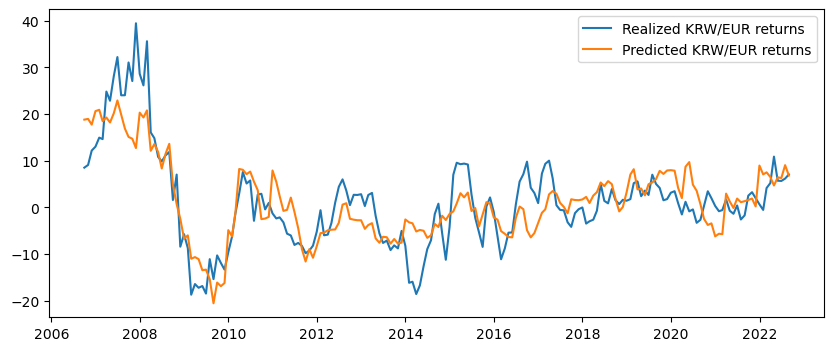

In [45]:
plt.plot(Y1, label = 'Realized KRW/EUR returns')
plt.plot(np.array(Y1.index), results.predict(), label = 'Predicted KRW/EUR returns')
plt.legend()
plt.show()

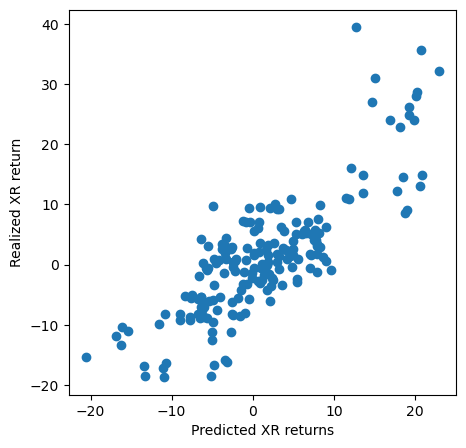

In [46]:
plt.figure(figsize = (5,5))
plt.scatter(results.predict(), Y1)
plt.xlabel('Predicted XR returns')
plt.ylabel('Realized XR return')
plt.show()

### (3) Forecasting

In [47]:
df_merged.tail(3)

,krw_eur,cpi_kr,int_kr_3m,int_kr_1y,int_kr_3y,int_kr_10y,gdp_kr_sa,gdp_kr,ca_kr,reserve_kr,...,ca_gdp_kr_eur,tb_gdp_kr_eur,reserve_gdp_kr,int_rate_diff_3m,int_rate_diff_1y,int_rate_diff_3y,int_rate_diff_10y,infl_diff,pca_all_new,pca_mid_new
date,,,,,,,,,,,,,,,,,,,,,
2023-06-30,1426.55,128.65,3.548,3.563,3.662,3.675,1.0,1665245.5,7395.9,421453923.0,...,0.422724,0.29571,25.308816,0.158912,0.111480,0.824105,1.167902,-2.818222,-2.923040,-2.893206
2023-07-31,1411.33,128.74,3.582,3.523,3.681,3.761,1.0,1665245.5,7395.9,421803807.0,...,0.422724,0.29571,25.329827,0.103366,0.107690,0.938195,1.217593,-3.044241,-2.897187,-2.874486
2023-08-31,1445.68,128.74,3.572,3.489,3.747,3.889,1.0,1665245.5,7395.9,421803807.0,...,0.422724,0.29571,25.329827,0.151655,0.163189,1.012632,1.310777,-2.930407,-2.786171,-2.774297


In [48]:
last_obs = df_merged.iloc[-1]

In [49]:
last_xr = last_obs['krw_eur']
last_xr

1445.68

In [50]:
# exogeneous
exog = last_obs[columns]
exog = [1, *exog]

In [51]:
exog

[1,
 1.1904458397785487,
 1.0000000000000007,
 0.6,
 -2.930407124681939,
 0.15165499999999987,
 0.44413271196349124,
 25.32982716362242,
 14.84,
 -5.3909843606255725]

In [52]:
pred_ret = results.predict(exog = exog)
pred_ret

array([22.7109223])

In [53]:
pred_xr = last_xr * (1+pred_ret[0]/100)
pred_xr

1774.007261483422

### (4) Confidence Interval

In [54]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [55]:
# predicted standard deviation, low interval, upper interval / 신뢰구간 95%
wls_prediction_std(results, exog = exog, alpha = 0.05)

(array([6.62206246]), array([9.64503629]), array([35.77680831]))

In [56]:
for alpha in [0.05, 0.25, 0.50]:
    prstd, iv_l, iv_u = \
        wls_prediction_std(results, exog = exog, alpha = alpha)
    
    print('Confidnece interval at alpha = {:.2f}: {:.2f} - {:.2f}'.format(
        alpha,
        last_xr * (1+iv_l[0]/100),
        last_xr * (1+iv_u[0]/100),
    ))

Confidnece interval at alpha = 0.05: 1585.12 - 1962.90
Confidnece interval at alpha = 0.25: 1663.53 - 1884.49
Confidnece interval at alpha = 0.50: 1709.31 - 1838.71
